In [1]:
from gsw import *

n=5
2
4
8
16
32
64
128
256
512
1024
2048
4096
8192
16384
32768


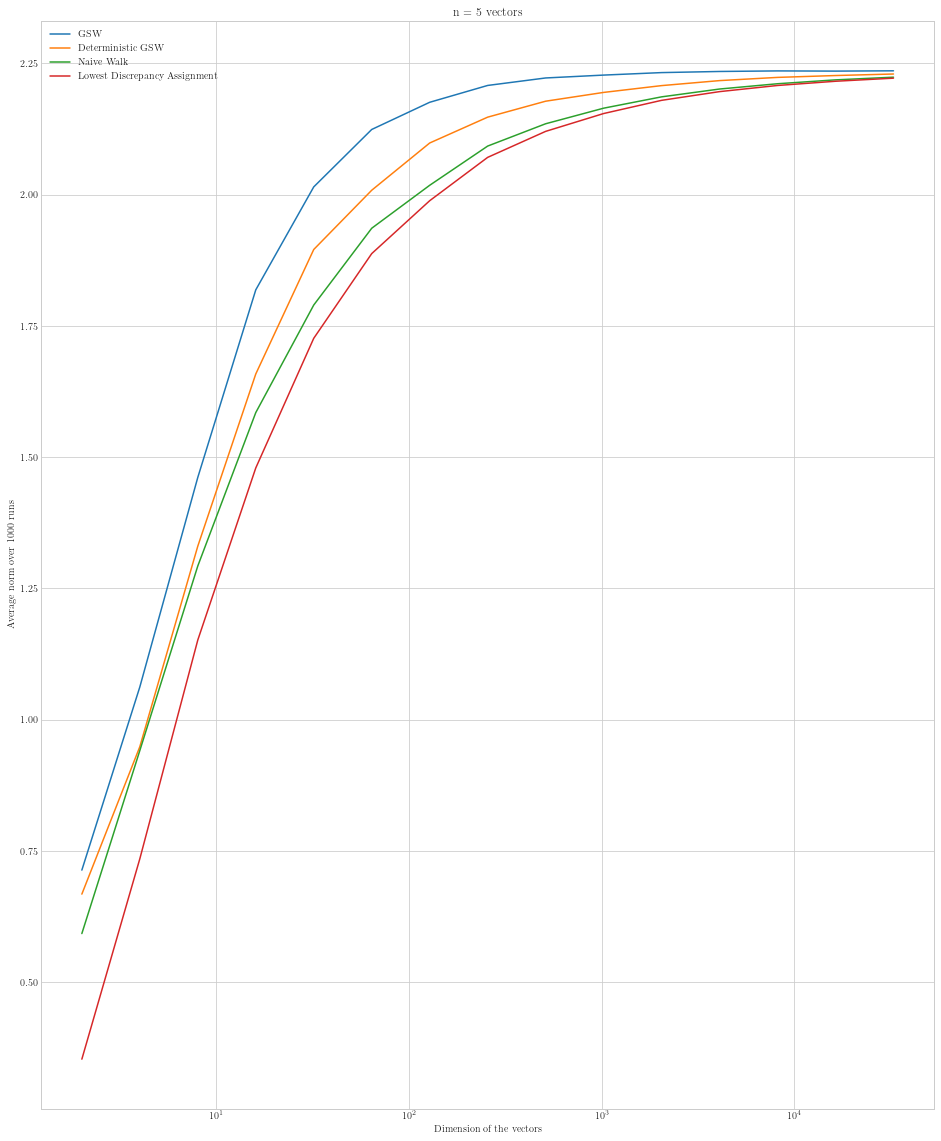

n=10
2
4
8
16
32
64
128
256
512
1024
2048
4096
8192
16384
32768


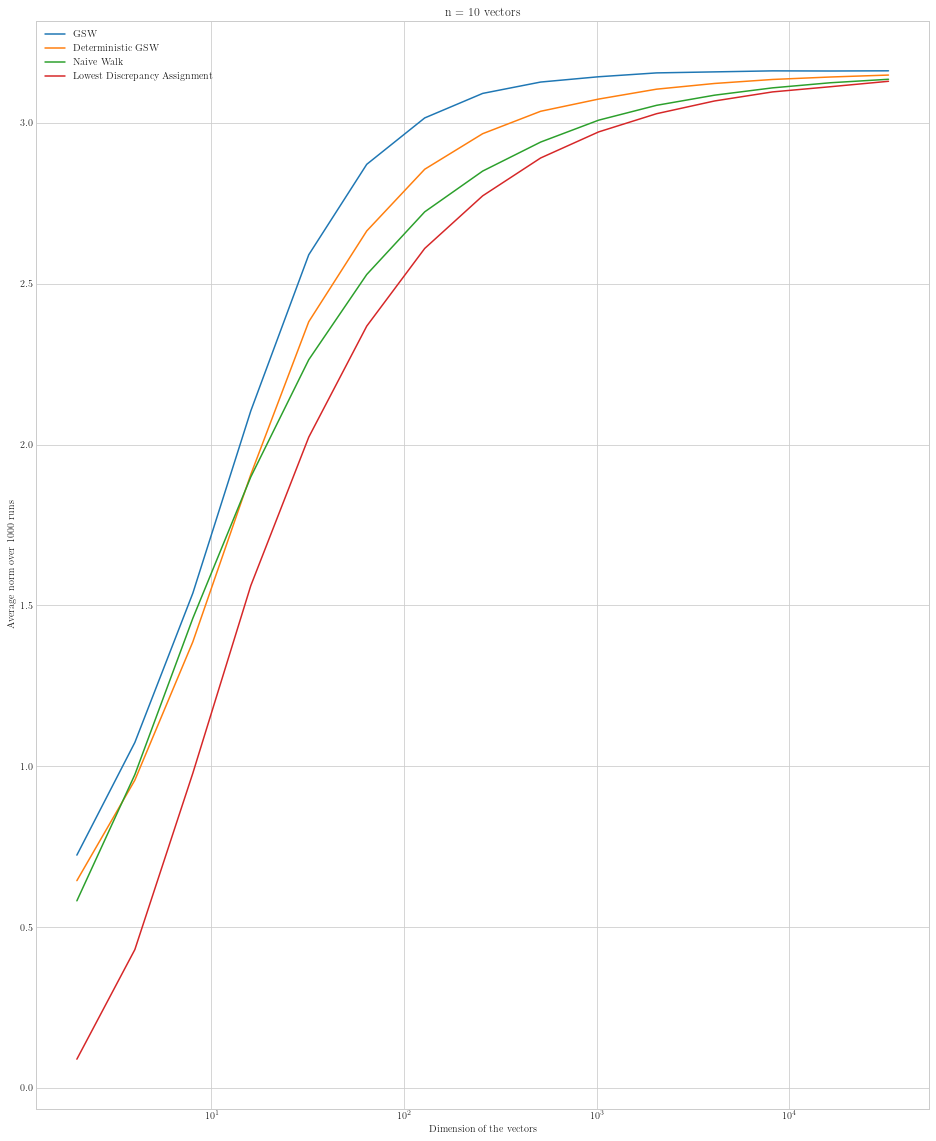

n=15
2
4
8
16
32
64
128
256
512
1024
2048
4096
8192
16384
32768


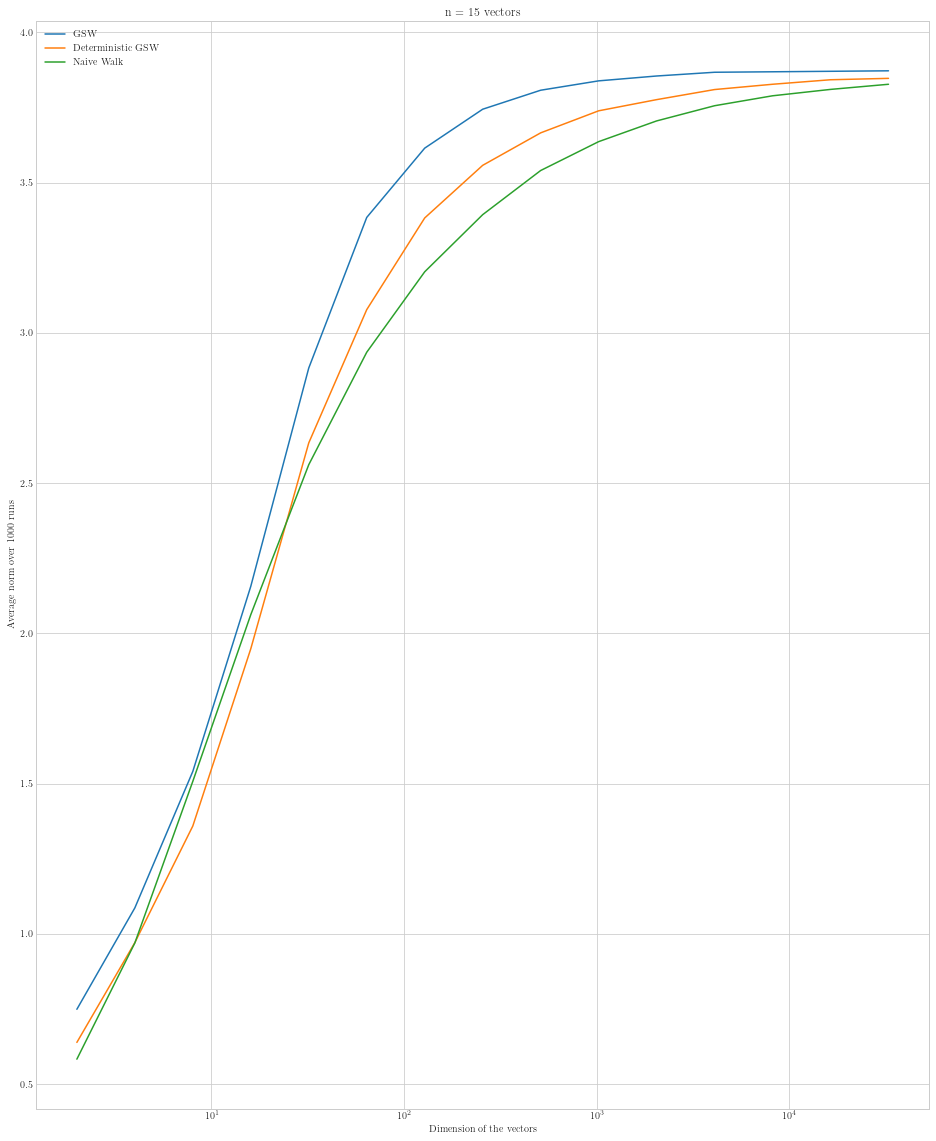

n=20
2
4
8
16
32
64
128
256
512
1024
2048
4096
8192
16384
32768


KeyboardInterrupt: 

In [2]:
max_power=15.0
l=np.logspace(1.0, max_power, num=int(max_power), base=2.0)
n_list=[5,10,15,20]
#n_list=[5,10]
repeat=10**3
#repeat=10**1

#load dics
norms_gsw=open_dic_file('norms_gsw.pkl')
norms_gsw_det=open_dic_file('norms_gsw_det.pkl')
norms_naive=open_dic_file('norms_naive.pkl')
norms_best=open_dic_file('norms_best.pkl')

for n in n_list:
    print(f'n={n}')
    if norms_gsw.get(n) is None:
        norms_gsw[n]={}
    if norms_gsw_det.get(n) is None:
        norms_gsw_det[n]={}
    if norms_naive.get(n) is None:
        norms_naive[n]={}
    if norms_best.get(n) is None:
        norms_best[n]={}
    for d_ in l:
        d=int(d_)
        print(d)
        if norms_gsw[n].get(d) is None:
            norms_gsw[n][d]=[]
        if norms_gsw_det[n].get(d) is None:
            norms_gsw_det[n][d]=[]
        if norms_naive[n].get(d) is None:
            norms_naive[n][d]=[]
        if norms_best[n].get(d) is None:
            norms_best[n][d]=[]
        while len(norms_gsw[n][d])<repeat:
            v=sample_from_ball(n,d=d)
            x=gram_schmidt_walk(v,np.zeros(n))
            B=np.transpose(np.vstack(tuple([e for e in v])))
            norms_gsw[n][d].append(np.sqrt(sum([x_**2 for x_ in np.matmul(B,x)])))
            x_det=gram_schmidt_walk(v,np.zeros(n),smallest_delta=True)
            norms_gsw_det[n][d].append(np.sqrt(sum([x_**2 for x_ in np.matmul(B,x_det)])))
            x_naive=naive_walk(v)
            norms_naive[n][d].append(np.sqrt(sum([x_**2 for x_ in np.matmul(B,x_naive)])))
            if n<=10:
                disc,x_best=best_coloring(v)
                norms_best[n][d].append(disc)
    plt.plot(l,[sum(norms_gsw[n][d])/repeat for d in l],label=f'GSW')
    plt.plot(l,[sum(norms_gsw_det[n][d])/repeat for d in l],label=f'Deterministic GSW')
    plt.plot(l,[sum(norms_naive[n][d])/repeat for d in l],label=f'Naive Walk')
    if n<=10:
        plt.plot(l,[sum(norms_best[n][d])/repeat for d in l],label=f'Lowest Discrepancy Assignment')
    plt.title(f'n = {n} vectors')
    plt.xlabel('Dimension of the vectors')
    plt.ylabel(f'Average norm over {repeat} runs')
    plt.legend()
    plt.xscale('log')
    plt.savefig(f'comparative_norms_n={n}_repeat={repeat}_max_dim={2**max_power}.pdf')
    tikzplotlib.save(f"comparative_norms_n={n}_repeat={repeat}_max_dim={2**max_power}.tex")
    plt.show()

In [4]:
#save dics
save_dic_to_file(norms_gsw,'norms_gsw.pkl')
save_dic_to_file(norms_gsw_det,'norms_gsw_det.pkl')
save_dic_to_file(norms_naive,'norms_naive.pkl')
save_dic_to_file(norms_best,'norms_best.pkl')

n=5
2
4
8
16
32
64
128
256
512
1024
2048
4096
8192
n=10
2


KeyboardInterrupt: 

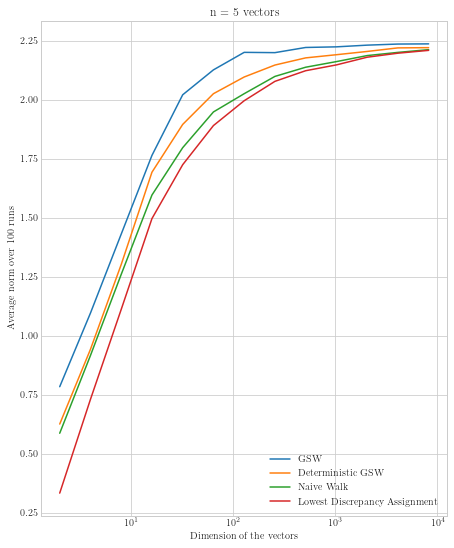

In [5]:
max_power=13.0
l=np.logspace(1.0, max_power, num=int(max_power), base=2.0)
n_list=[5,10,15,20]
#n_list=[5,10]
repeat=10**2
#repeat=10**1

#load dics
norms_gsw=open_dic_file('norms_gsw.pkl')
norms_gsw_det=open_dic_file('norms_gsw_det.pkl')
norms_naive=open_dic_file('norms_naive.pkl')
norms_best=open_dic_file('norms_best.pkl')

for n in n_list:
    print(f'n={n}')
    if norms_gsw.get(n) is None:
        norms_gsw[n]={}
    if norms_gsw_det.get(n) is None:
        norms_gsw_det[n]={}
    if norms_naive.get(n) is None:
        norms_naive[n]={}
    if norms_best.get(n) is None:
        norms_best[n]={}
    for d_ in l:
        d=int(d_)
        print(d)
        if norms_gsw[n].get(d) is None:
            norms_gsw[n][d]=[]
        if norms_gsw_det[n].get(d) is None:
            norms_gsw_det[n][d]=[]
        if norms_naive[n].get(d) is None:
            norms_naive[n][d]=[]
        if norms_best[n].get(d) is None:
            norms_best[n][d]=[]
        while min(len(norms_gsw[n][d]),len(norms_gsw_det[n][d]),len(norms_naive[n][d]))<repeat and (len(norms_best[n][d])<repeat or n>10):
            #print(len(norms_gsw[n][d]))
            v=sample_from_ball(n,d=d)
            B=np.transpose(np.vstack(tuple([e for e in v])))
            if len(norms_gsw[n][d])<repeat:
                x=gram_schmidt_walk(v,np.zeros(n))
                norms_gsw[n][d].append(np.sqrt(sum([x_**2 for x_ in np.matmul(B,x)])))
            if len(norms_gsw_det[n][d])<repeat:
                x_det=gram_schmidt_walk(v,np.zeros(n),smallest_delta=True)
                norms_gsw_det[n][d].append(np.sqrt(sum([x_**2 for x_ in np.matmul(B,x_det)])))
            if len(norms_naive[n][d])<repeat:
                x_naive=naive_walk(v)
                norms_naive[n][d].append(np.sqrt(sum([x_**2 for x_ in np.matmul(B,x_naive)])))
            if n<=10 and len(norms_best[n][d])<repeat:
                disc,x_best=best_coloring(v)
                norms_best[n][d].append(disc)
    plt.subplot(2,2,int(n/5))
    plt.plot(l,[sum(norms_gsw[n][d])/repeat for d in l],label=f'GSW')
    plt.plot(l,[sum(norms_gsw_det[n][d])/repeat for d in l],label=f'Deterministic GSW')
    plt.plot(l,[sum(norms_naive[n][d])/repeat for d in l],label=f'Naive Walk')
    if n<=10:
        plt.plot(l,[sum(norms_best[n][d])/repeat for d in l],label=f'Lowest Discrepancy Assignment')
    plt.title(f'n = {n} vectors')
    plt.xlabel('Dimension of the vectors')
    plt.ylabel(f'Average norm over {repeat} runs')
    plt.legend()
    plt.xscale('log')
plt.savefig(f'comparative_norms_n={n_list}_repeat={repeat}_max_dim={2**max_power}.pdf')
tikzplotlib.save(f"comparative_norms_n={n}_repeat={repeat}_max_dim={2**max_power}.tex")
plt.show()